# Which one does a better classification job with handwritten numbners data: Decision Trees vs. Random Forest

In [1]:
from sklearn import datasets, tree
# from keras.datasets import mnist    
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

# MNIST Data loading

In [2]:
# mnist has 8x8 images (n=1797) 
mnist = datasets.load_digits()
features, labels = mnist.data, mnist.target

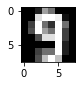

In [3]:
# Display a digit
plt.figure(figsize=(1, 1))
plt.imshow(mnist.images[-2], cmap=('gray'))
plt.show()

# Making a CV Tool to Compare DT and RF

In [5]:
def cross_validation(classifier, features, lables):
    cv_scores = []
    
    for i in range(15):
        scores = cross_val_score(classifier, features, labels, cv=10, scoring='accuracy')
        cv_scores.append(scores.mean())
        
    return cv_scores


# Run CV for each classifier

In [6]:
dt_cv_scores = cross_validation(tree.DecisionTreeClassifier(), features, labels)

In [7]:
rf_cv_scores = cross_validation(RandomForestClassifier(n_estimators =20), features, labels)

# Visualizing Results

In [8]:
cv_list = [    
            ['random_forest',rf_cv_scores],
            ['decision_tree',dt_cv_scores],
          ]
cv_list

[['random_forest',
  [0.9304345127250155,
   0.9382402234636871,
   0.9337647423960274,
   0.9254127870887648,
   0.934332712600869,
   0.9281905648665425,
   0.934320297951583,
   0.9304376163873371,
   0.9354407200496585,
   0.9304127870887647,
   0.9382247051520795,
   0.9387926753569211,
   0.9437926753569211,
   0.9349037864680321,
   0.9349068901303538]],
 ['decision_tree',
  [0.8274922408441961,
   0.8269056486654252,
   0.8336002482929856,
   0.8219242706393544,
   0.8274456859093731,
   0.8263749224084419,
   0.8313718187461203,
   0.8302513966480447,
   0.8269211669770329,
   0.8213500931098696,
   0.8302513966480447,
   0.829143389199255,
   0.8280291744258225,
   0.8235630043451272,
   0.8297082557417752]]]

<AxesSubplot:>

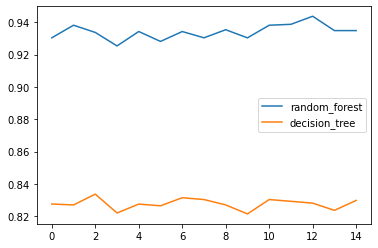

In [9]:
df = pd.DataFrame.from_dict(dict(cv_list))
df.plot()

# Calculate Average Accuracy Scores

In [10]:
np.mean(dt_cv_scores)

0.8276221808400577

In [11]:
np.mean(rf_cv_scores)

0.9341071798055037